# Cálculo del quemado de un EE.CC. a partir de las cuentas neutrónicas del SICOM-NG-FA y otras variables de interés.

In [1]:
import pandas as pd

df = pd.read_csv("DataSet.csv", sep=';', index_col="ind")
df.head()

,EECC,TipoEC,Muestra,Cnn,T(ms),Cnn/s,Ciclos,Enf(mes),Enr(%),Mwd/TnU
ind,,,,,,,,,,
1,BL09,MAEF,1,32458,146916,220.94,3,127,4.697,44082
2,BL09,MAEF,2,39967,150917,264.84,3,127,4.697,46265
3,BL09,MAEF,3,39438,145916,270.29,3,127,4.697,46517
4,BL09,MAEF,4,30342,145930,207.93,3,127,4.697,43374
5,BL09,MAEF,5,30361,140921,215.46,3,127,4.697,43788


### Codificación de la categoría TipoEC

In [2]:
# df.TipoEC.value_counts()

dummies = pd.get_dummies(df['TipoEC'])
df = pd.concat([df, dummies], axis = 1)
df.drop('TipoEC', axis=1, inplace=True)
df.head()

,EECC,Muestra,Cnn,T(ms),Cnn/s,Ciclos,Enf(mes),Enr(%),Mwd/TnU,AEF,MAEF,OFA,STD
ind,,,,,,,,,,,,,
1,BL09,1,32458,146916,220.94,3,127,4.697,44082,0,1,0,0
2,BL09,2,39967,150917,264.84,3,127,4.697,46265,0,1,0,0
3,BL09,3,39438,145916,270.29,3,127,4.697,46517,0,1,0,0
4,BL09,4,30342,145930,207.93,3,127,4.697,43374,0,1,0,0
5,BL09,5,30361,140921,215.46,3,127,4.697,43788,0,1,0,0


### Reordeno los datos y elimino varias columnas [Cnn y T(ms), porque son combinación lineal de Cnn/s; AEF, porque es la ausencia de MAEF, OFA y STD simultáneamente]

In [3]:
df = df [['EECC', 'Muestra', 'MAEF', 'OFA', 'STD', 'Cnn/s', 'Ciclos', 'Enf(mes)', 'Enr(%)', 'Mwd/TnU']]
df.head()

,EECC,Muestra,MAEF,OFA,STD,Cnn/s,Ciclos,Enf(mes),Enr(%),Mwd/TnU
ind,,,,,,,,,,
1,BL09,1,1,0,0,220.94,3,127,4.697,44082
2,BL09,2,1,0,0,264.84,3,127,4.697,46265
3,BL09,3,1,0,0,270.29,3,127,4.697,46517
4,BL09,4,1,0,0,207.93,3,127,4.697,43374
5,BL09,5,1,0,0,215.46,3,127,4.697,43788


### Tipificación y discretización de los datos

In [4]:
from scipy import stats
from sklearn.preprocessing import KBinsDiscretizer


# Creo una función para tipificar las columnas del df
def TipificarColumnas(dataframe, column):
    dataframe[column] = dataframe[column].astype(float)
    dataframe[column] = stats.zscore(dataframe[column])
    return dataframe

# Copio el df para no modificar el original y tipifico las cinco últimas columnas
data = df.copy()
for column in data.columns[-5:]:
    data = TipificarColumnas(data, column)


data.head()

,EECC,Muestra,MAEF,OFA,STD,Cnn/s,Ciclos,Enf(mes),Enr(%),Mwd/TnU
ind,,,,,,,,,,
1,BL09,1,1,0,0,-0.103873,0.536875,-0.602062,0.871258,0.273655
2,BL09,2,1,0,0,0.218885,0.536875,-0.602062,0.871258,0.532389
3,BL09,3,1,0,0,0.258954,0.536875,-0.602062,0.871258,0.562256
4,BL09,4,1,0,0,-0.199524,0.536875,-0.602062,0.871258,0.189741
5,BL09,5,1,0,0,-0.144162,0.536875,-0.602062,0.871258,0.238809


### Cálculo de estadísticos

In [5]:
import numpy as np
from scipy.stats import iqr

# Por algún motivo asigna por defecto el tipo object a los estadísticos, así que
# especifico que los quiero de tipo float para que les aplique set_printoptions.
medias = np.mean(data.values[:,5:], axis=0).astype(float)
varianzas = np.var(data.values[:,5:], axis=0).astype(float)
medianas = np.median(data.values[:,5:], axis=0).astype(float)
intercuartil = iqr(data.values[:,5:], axis=0).astype(float)
# print(medias.dtype, varianzas.dtype, medianas.dtype, intercuartil.dtype)

np.set_printoptions(precision = 3)

# Compruebo que las variables están tipificadas (media = 0, varianza = 1)
print('Medias: ', medias)
print()
print('Varianzas: ', varianzas)
print()
print('Medianas: ', medianas)
print()
print('Distancia intercuartil: ', intercuartil)

Medias:  [ 2.623e-17  1.779e-16 -6.692e-17 -4.395e-16  1.582e-16]

Varianzas:  [1. 1. 1. 1. 1.]

Medianas:  [-0.01   0.537 -0.247  0.619  0.249]

Distancia intercuartil:  [1.84  1.4   1.858 1.348 1.592]


### Diagramas de cajas e histogramas

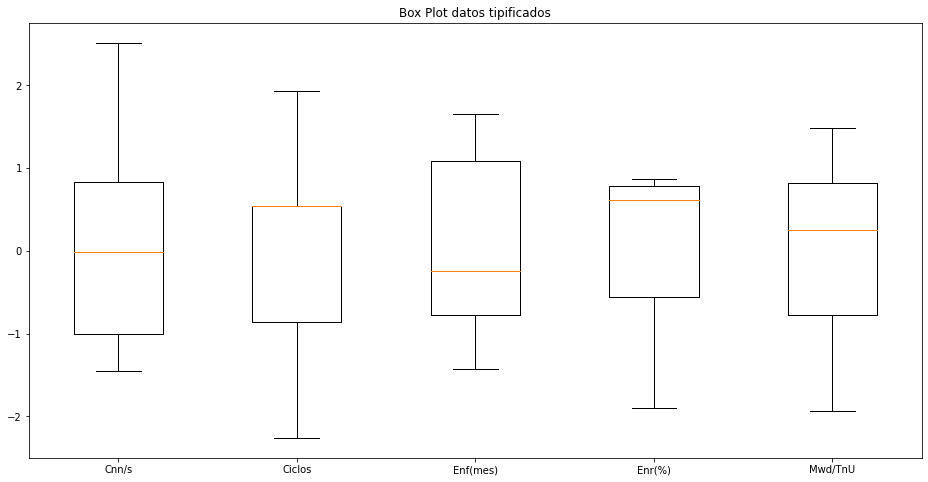

In [6]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(figsize=(16,8))
ax1.set_title('Box Plot datos tipificados')
ax1.boxplot(data.values[:,5:], labels=data.columns.tolist()[5:])
plt.show()

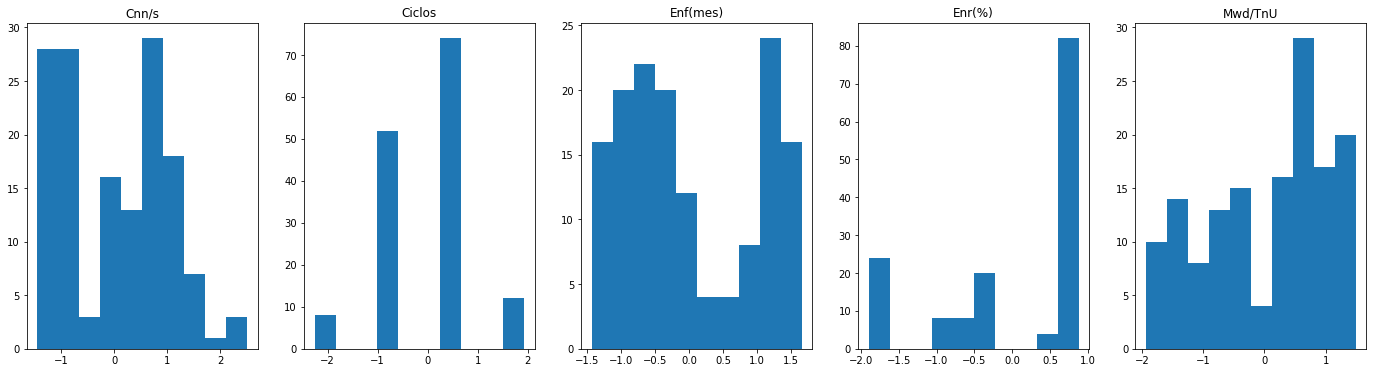

In [7]:
# Diagramas de las variables tipificadas
fig2,ax2 = plt.subplots(1,5,figsize=(24,6))
variables = data.columns.tolist()[5:]
for a,var in enumerate(variables):
    ax2[a].hist(data[var].values)
    ax2[a].set_title(var)
    a+1
plt.show()
plt.close()

In [8]:
# Discretizo para visualizar después los datos según rangos de estas variables.
# Elijo el número de intervalos según las modas en la distribución.
enfriDis = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans').fit_transform(df[['Enf(mes)']])
enriqDis = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans').fit_transform(df[['Enr(%)']])

# Añado las variables discretas al dataframe
data['Ciclos_D'] = df['Ciclos'].astype(float)
data['Enf(mes)_D'] = enfriDis
data['Enr(%)_D'] = enriqDis

data.head()

,EECC,Muestra,MAEF,OFA,STD,Cnn/s,Ciclos,Enf(mes),Enr(%),Mwd/TnU,Ciclos_D,Enf(mes)_D,Enr(%)_D
ind,,,,,,,,,,,,,
1,BL09,1,1,0,0,-0.103873,0.536875,-0.602062,0.871258,0.273655,3.0,0.0,2.0
2,BL09,2,1,0,0,0.218885,0.536875,-0.602062,0.871258,0.532389,3.0,0.0,2.0
3,BL09,3,1,0,0,0.258954,0.536875,-0.602062,0.871258,0.562256,3.0,0.0,2.0
4,BL09,4,1,0,0,-0.199524,0.536875,-0.602062,0.871258,0.189741,3.0,0.0,2.0
5,BL09,5,1,0,0,-0.144162,0.536875,-0.602062,0.871258,0.238809,3.0,0.0,2.0


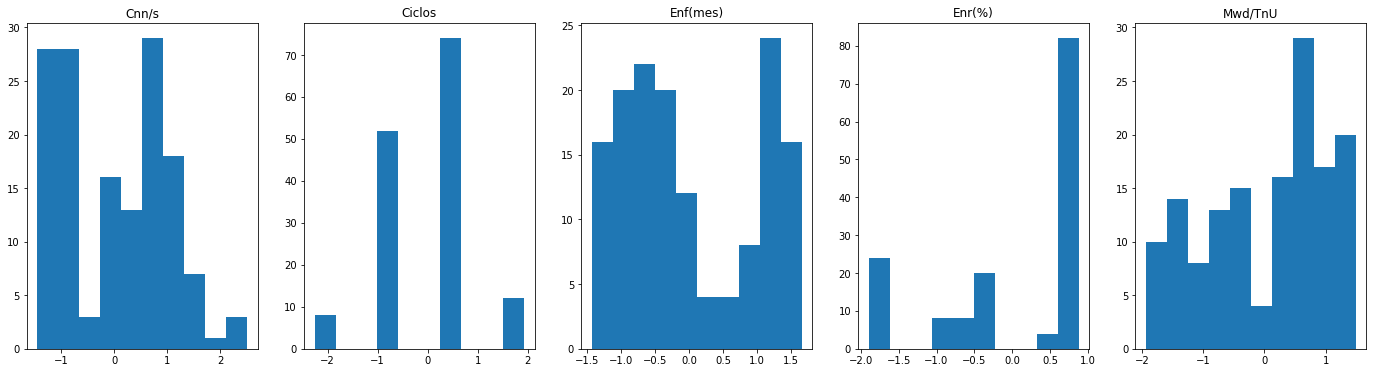

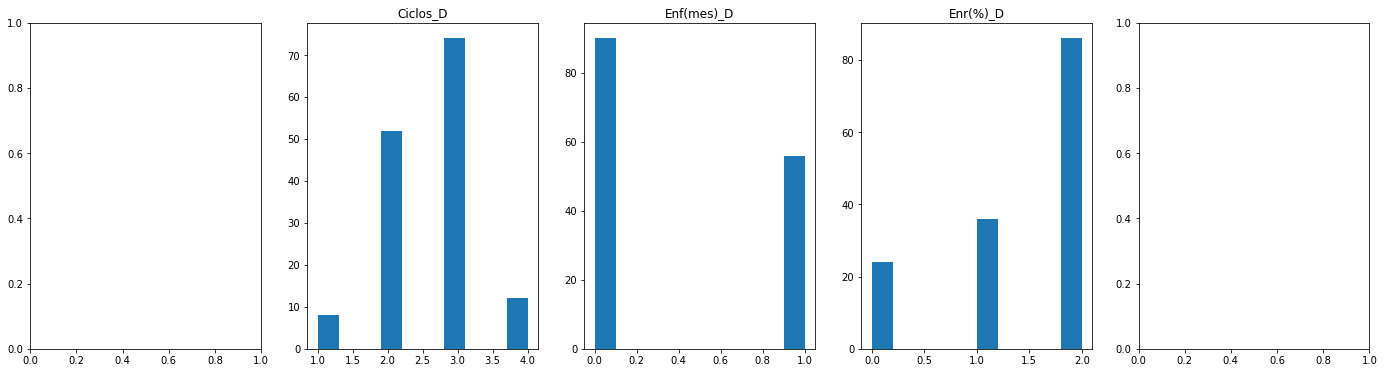

In [9]:
# Diagramas de las variables tipificadas
fig3,ax3 = plt.subplots(1,5,figsize=(24,6))
variables = data.columns.tolist()[5:10]
for a,var in enumerate(variables):
    ax3[a].hist(data[var].values)
    ax3[a].set_title(var)
    a+1

# Diagramas de las variables discretizadas
fig4,ax4 = plt.subplots(1,5,figsize=(24,6))
variables = data.columns.tolist()[10:]
for a,var in enumerate(variables):
    ax4[a+1].hist(data[var].values)
    ax4[a+1].set_title(var)
    a+1

plt.show()
plt.close()

### Coeficiente de correlación entre Cnn/s y Mwd/TnU

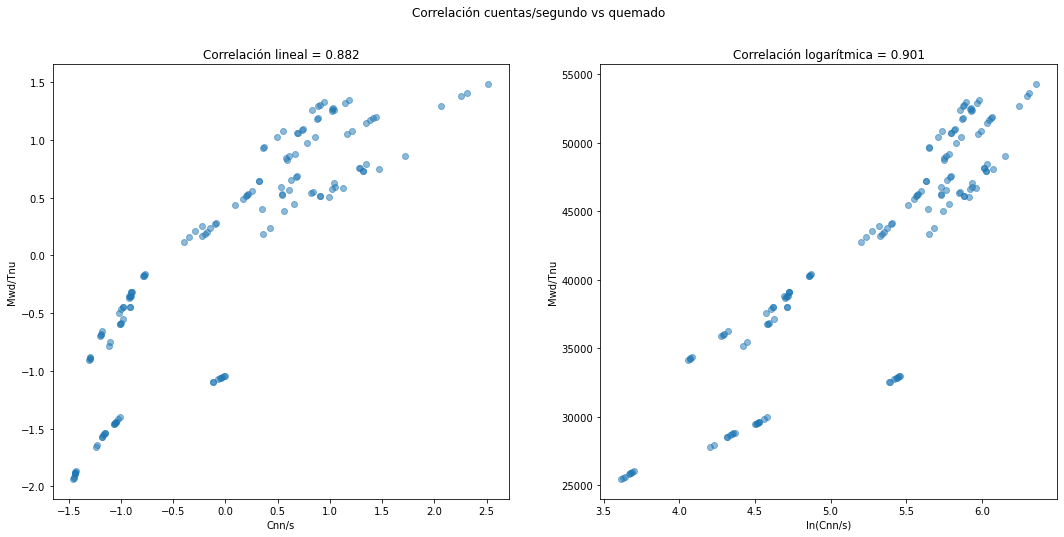

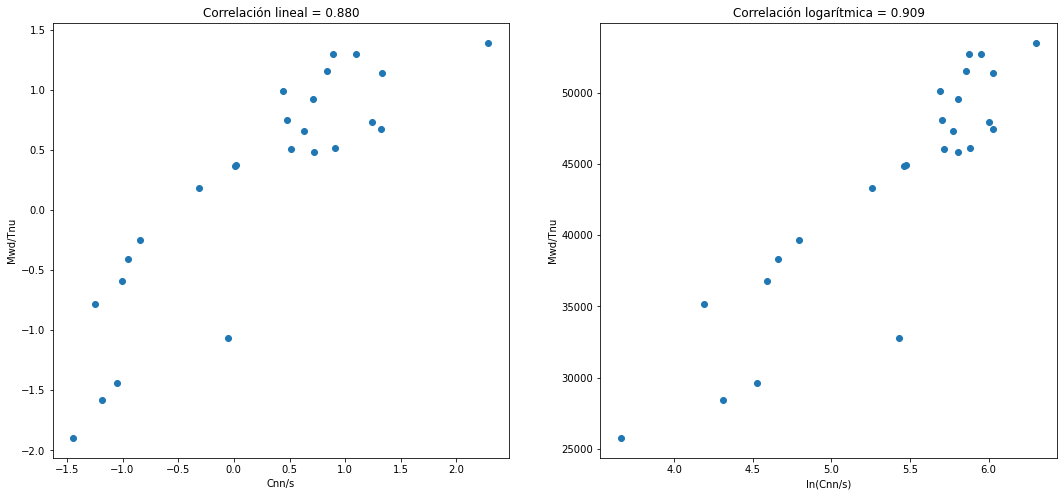

In [10]:
indep = data['Cnn/s'].values
dep = data['Mwd/TnU'].values
indepL = np.log(df['Cnn/s'].values)
depL = df['Mwd/TnU'].values

corrcoef = np.corrcoef(indep, dep)
corrcoefL = np.corrcoef(indepL, depL)


fig,ax = plt.subplots(1, 2, figsize=(18,8))

ax[0].plot(indep, dep, 'o', alpha=0.5)
ax[0].set_title('Correlación lineal = {:.3f}'.format(corrcoef[0,1]))
ax[0].set_xlabel('Cnn/s')
ax[0].set_ylabel('Mwd/Tnu')

ax[1].plot(indepL, depL, 'o', alpha=0.5)
ax[1].set_title('Correlación logarítmica = {:.3f}'.format(corrcoefL[0,1]))
ax[1].set_xlabel('ln(Cnn/s)')
ax[1].set_ylabel('Mwd/Tnu')


# Para visualizar los datos por EECC en lugar de por caras:
dataEECC = data.groupby(['EECC']).mean().drop(['Muestra'], axis=1)
dfEECC = df.groupby(['EECC']).mean().drop(['Muestra'], axis=1)
# dfEECC.info()

indepEECC = dataEECC['Cnn/s'].values
depEECC = dataEECC['Mwd/TnU'].values
indepEECCL = np.log(dfEECC['Cnn/s'].values)
depEECCL = dfEECC['Mwd/TnU'].values

corrcoef = np.corrcoef(indepEECC,depEECC)
corrcoefL = np.corrcoef(indepEECCL,depEECCL)


figEECC,axEECC = plt.subplots(1, 2, figsize=(18,8))

axEECC[0].plot(indepEECC, depEECC, 'o')
axEECC[0].set_title('Correlación lineal = {:.3f}'.format(corrcoef[0,1]))
axEECC[0].set_xlabel('Cnn/s')
axEECC[0].set_ylabel('Mwd/Tnu')

axEECC[1].plot(indepEECCL, depEECCL, 'o')
axEECC[1].set_title('Correlación logarítmica = {:.3f}'.format(corrcoefL[0,1]))
axEECC[1].set_xlabel('ln(Cnn/s)')
axEECC[1].set_ylabel('Mwd/Tnu')

fig.suptitle('Correlación cuentas/segundo vs quemado')

plt.show()
plt.close()

### Mínimos cuadrados:  $\beta = (X^{T}X)^{-1}X^{T}Y$

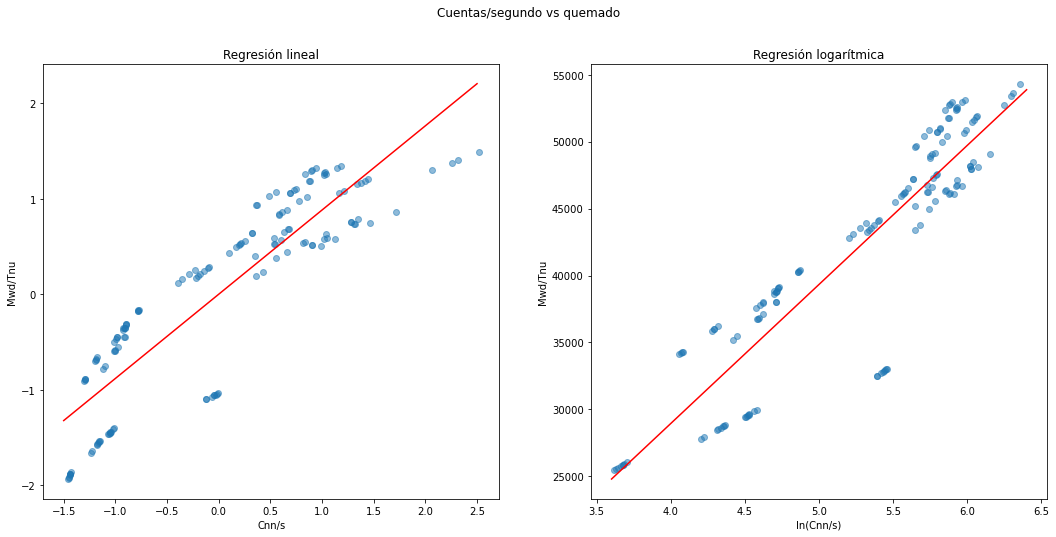

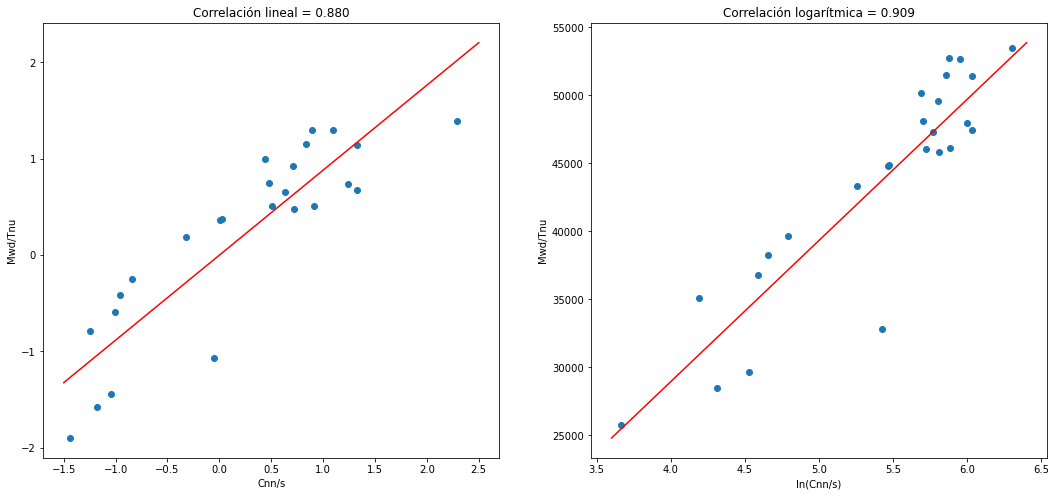

In [11]:
# Incluyo término independiente
X = np.array([np.ones(data['Cnn/s'].shape[0]), data['Cnn/s']]).T
B = np.linalg.inv(X.T @ X) @ X.T @ data['Mwd/TnU']
XL = np.array([np.ones(df['Cnn/s'].shape[0]), np.log(df['Cnn/s'])]).T
BL = np.linalg.inv(XL.T @ XL) @ XL.T @ df['Mwd/TnU']
# print(B)
# print(BL)


# Gráficas incluyendo la línea de regresión
fig,ax = plt.subplots(1, 2, figsize=(18,8))

ax[0].plot(indep, dep, 'o', alpha=0.5)
ax[0].set_title('Regresión lineal')
ax[0].set_xlabel('Cnn/s')
ax[0].set_ylabel('Mwd/Tnu')
ax[0].plot([-1.5, 2.5], [B[0]+B[1]*(-1.5), B[0]+B[1]*2.5], c='red')

ax[1].plot(indepL, depL, 'o', alpha=0.5)
ax[1].set_title('Regresión logarítmica')
ax[1].set_xlabel('ln(Cnn/s)')
ax[1].set_ylabel('Mwd/Tnu')
ax[1].plot([3.6, 6.4], [BL[0]+BL[1]*3.6, BL[0]+BL[1]*6.4], c='red')

figEECC,axEECC = plt.subplots(1, 2, figsize=(18,8))

axEECC[0].plot(indepEECC, depEECC, 'o')
axEECC[0].set_title('Correlación lineal = {:.3f}'.format(corrcoef[0,1]))
axEECC[0].set_xlabel('Cnn/s')
axEECC[0].set_ylabel('Mwd/Tnu')
axEECC[0].plot([-1.5, 2.5], [B[0]+B[1]*(-1.5), B[0]+B[1]*2.5], c='red')

axEECC[1].plot(indepEECCL, depEECCL, 'o')
axEECC[1].set_title('Correlación logarítmica = {:.3f}'.format(corrcoefL[0,1]))
axEECC[1].set_xlabel('ln(Cnn/s)')
axEECC[1].set_ylabel('Mwd/Tnu')
axEECC[1].plot([3.6, 6.4], [BL[0]+BL[1]*3.6, BL[0]+BL[1]*6.4], c='red')

fig.suptitle('Cuentas/segundo vs quemado')

plt.show()
plt.close()

### Correlación separando por colores según las demás variables

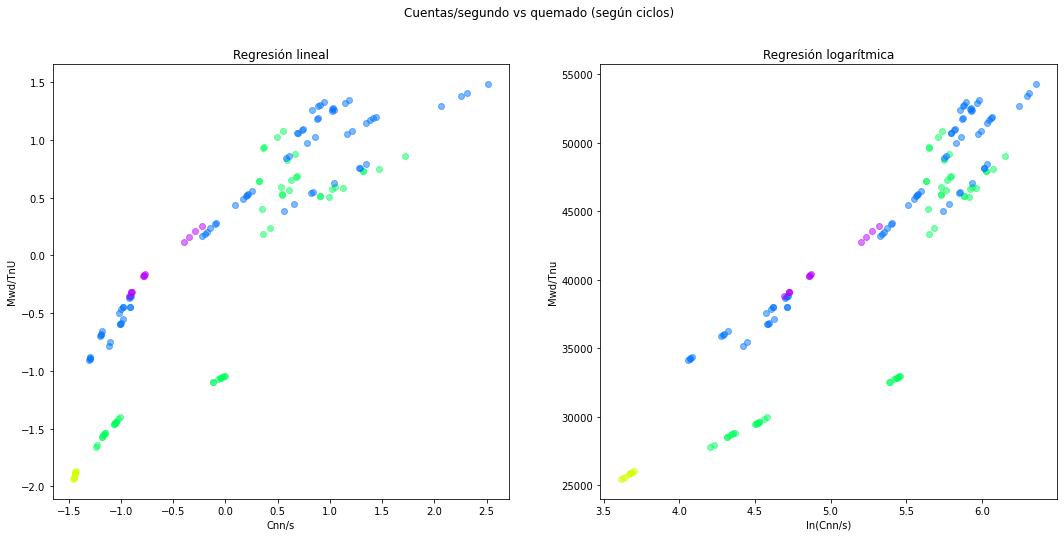

In [12]:
import matplotlib

cmap = matplotlib.cm.get_cmap('hsv')

fig,ax = plt.subplots(1, 2, figsize=(18,8))
colores = int(np.amax(data['Ciclos_D'].values)+1)

for i in range(colores):
    indep = data['Cnn/s'].loc[data['Ciclos_D']==i].values
    dep = data['Mwd/TnU'].loc[data['Ciclos_D']==i].values
    ax[0].plot(indep,dep, 'o', alpha=0.5, c=cmap(i/colores))
    
    indepL = np.log(df['Cnn/s']).loc[data['Ciclos_D']==i].values
    depL = df['Mwd/TnU'].loc[data['Ciclos_D']==i].values
    ax[1].plot(indepL,depL, 'o', alpha=0.5, c=cmap(i/colores))
    
ax[0].set_title('Regresión lineal')
ax[0].set_xlabel('Cnn/s')
ax[0].set_ylabel('Mwd/TnU')

ax[1].set_title('Regresión logarítmica')
ax[1].set_xlabel('ln(Cnn/s)')
ax[1].set_ylabel('Mwd/Tnu')

fig.suptitle('Cuentas/segundo vs quemado (según ciclos)')

plt.show()
plt.close()

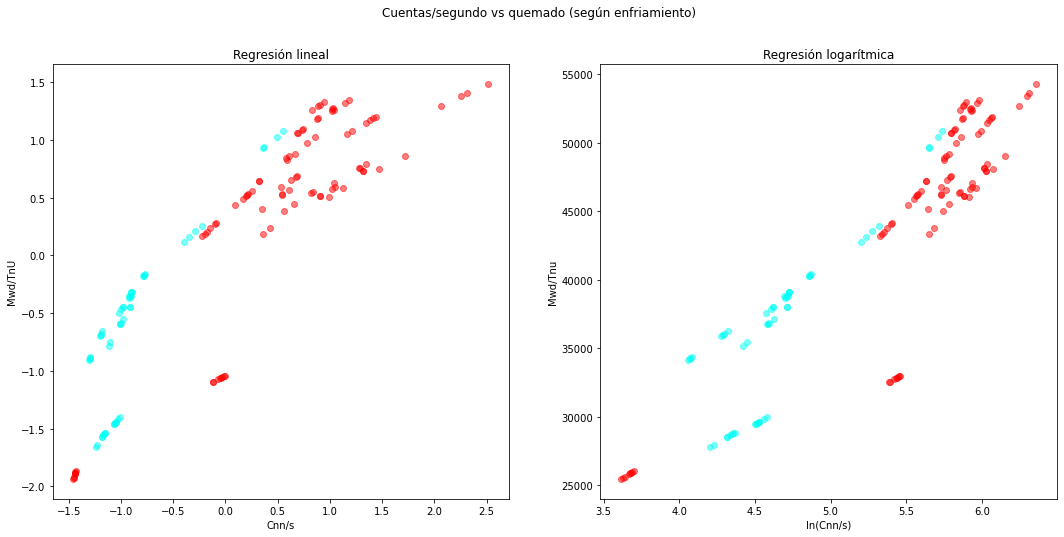

In [13]:
fig,ax = plt.subplots(1, 2, figsize=(18,8))
colores = int(np.amax(data['Enf(mes)_D'].values)+1)

for i in range(colores):
    indep = data['Cnn/s'].loc[data['Enf(mes)_D']==i].values
    dep = data['Mwd/TnU'].loc[data['Enf(mes)_D']==i].values
    ax[0].plot(indep,dep, 'o', alpha=0.5, c=cmap(i/colores))
    
    indepL = np.log(df['Cnn/s']).loc[data['Enf(mes)_D']==i].values
    depL = df['Mwd/TnU'].loc[data['Enf(mes)_D']==i].values
    ax[1].plot(indepL,depL, 'o', alpha=0.5, c=cmap(i/colores))
    
ax[0].set_title('Regresión lineal')
ax[0].set_xlabel('Cnn/s')
ax[0].set_ylabel('Mwd/TnU')

ax[1].set_title('Regresión logarítmica')
ax[1].set_xlabel('ln(Cnn/s)')
ax[1].set_ylabel('Mwd/Tnu')

fig.suptitle('Cuentas/segundo vs quemado (según enfriamiento)')

plt.show()
plt.close()

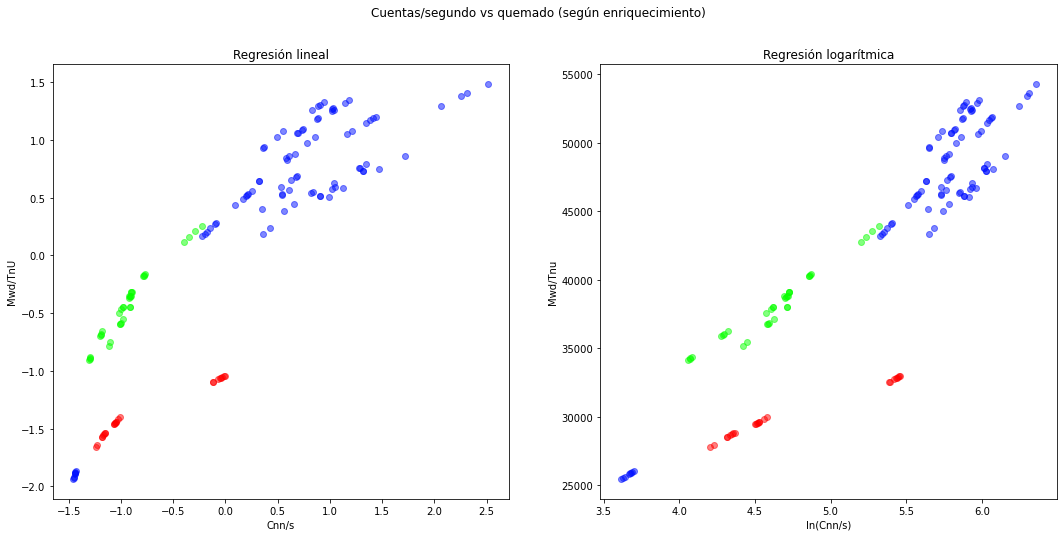

In [14]:
fig,ax = plt.subplots(1, 2, figsize=(18,8))
colores = int(np.amax(data['Enr(%)_D'].values)+1)

for i in range(colores):
    indep = data['Cnn/s'].loc[data['Enr(%)_D']==i].values
    dep = data['Mwd/TnU'].loc[data['Enr(%)_D']==i].values
    ax[0].plot(indep,dep, 'o', alpha=0.5, c=cmap(i/colores))

    indepL = np.log(df['Cnn/s']).loc[data['Enr(%)_D']==i].values
    depL = df['Mwd/TnU'].loc[data['Enr(%)_D']==i].values
    ax[1].plot(indepL,depL, 'o', alpha=0.5, c=cmap(i/colores))

ax[0].set_title('Regresión lineal')
ax[0].set_xlabel('Cnn/s')
ax[0].set_ylabel('Mwd/TnU')

ax[1].set_title('Regresión logarítmica')
ax[1].set_xlabel('ln(Cnn/s)')
ax[1].set_ylabel('Mwd/Tnu')

fig.suptitle('Cuentas/segundo vs quemado (según enriquecimiento)')

plt.show()
plt.close()

### Mínimos cuadrados con todas las variables: $\beta = (X^{T}X)^{-1}X^{T}Y$

In [15]:
X = np.array([np.ones(data['Cnn/s'].shape[0]), data['Cnn/s'], data['Ciclos'], data['Enf(mes)'], data['Enr(%)']]).T
B = np.linalg.inv(X.T @ X) @ X.T @ data['Mwd/TnU']
XL = np.array([np.ones(df['Cnn/s'].shape[0]), np.log(df['Cnn/s']), np.log(df['Ciclos']), \
               np.log(df['Enf(mes)']), np.log(df['Enr(%)'])]).T
BL = np.linalg.inv(XL.T @ XL) @ XL.T @ df['Mwd/TnU']

print(B)
print()
print(BL)

[4.345e-16 8.662e-01 1.011e-01 4.736e-01 5.258e-01]

[-48849.678   9076.753   1238.675   4287.401  15351.33 ]


Entonces:

$Mwd/Tnu \; = \; B[0] + B[1] \cdot Cnn/s + B[2] \cdot Ciclos + B[3] \cdot Enf(mes) + B[4] \cdot Enr(\%)$

$Mwd/Tnu \; = \; BL[0] + BL[1] \cdot \ln(Cnn/s) + BL[2] \cdot \ln(Ciclos) + BL[3] \cdot \ln(Enf(mes)) + BL[4] \cdot \ln(Enr(\%))$

# Método LOOCV (Leave One Out Cross Validation)

In [16]:
# df.head()

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# Creo nuevos dataframes vacíos, donde iré guardando los resultados de cada iteración.
LOOCV = pd.DataFrame(columns=['Excluido', 'Predicción', 'Validación', 'Error'])
LOOCVL = pd.DataFrame(columns=['Excluido', 'Predicción', 'Validación', 'Error'])

# Hago una lista con la identificación de cada elemento
lista = data['EECC'].unique().tolist()
# print(lista)

# En cada bucle separo las 4 u 8 medidas de un elemento en "valid" y el resto de medidas las guardo en "entren"
# para hacer las regresiones con ellas, y voy almacenando los resultados en los nuevos dataframes.
agrupa = data.groupby(data.EECC)
agrupaL = df.groupby(df.EECC)

for excluido in lista:
    # print(excluido)
    
    valid = agrupa.get_group(excluido)
    valid = np.mean(valid.values[:,5:10], axis=0)
    validL = agrupaL.get_group(excluido)
    validL = np.mean(validL.values[:,5:], axis=0)
    # print(valid)
    # print(validL)
    
    entren = data[data.EECC != excluido]
    entrenL = df[df.EECC != excluido]
    # print(entren)
    # print (entrenL)
    
    X = np.array([np.ones(entren['Cnn/s'].shape[0]), entren['Cnn/s'], \
                  entren['Ciclos'], entren['Enf(mes)'], entren['Enr(%)']]).T
    B = np.linalg.inv(X.T @ X) @ X.T @ entren['Mwd/TnU']
    XL = np.array([np.ones(entrenL['Cnn/s'].shape[0]), np.log(entrenL['Cnn/s']), \
                   np.log(entrenL['Ciclos']), np.log(entrenL['Enf(mes)']), \
                   np.log(entrenL['Enr(%)'])]).T
    BL = np.linalg.inv(XL.T @ XL) @ XL.T @ entrenL['Mwd/TnU']
    
    sol = valid[4]
    calc = B[0]+B[1]*valid[0]+B[2]*valid[1]+B[3]*valid[2]+B[4]*valid[3]
    solL = validL[4]
    calcL = BL[0]+BL[1]*np.log(validL[0])+BL[2]*np.log(validL[1])+BL[3]*np.log(validL[2])+BL[4]*np.log(validL[3])
    error = ((calc - sol)/sol)*100
    errorL = ((calcL - solL)/solL)*100
    # print('{0:.2f} %'.format(error))
    # print('{0:.2f} %'.format(errorL))
    
    LOOCV = LOOCV.append({'Excluido': excluido, 'Predicción': calc, 'Validación': sol, \
                          'Error': '{0:.2f}%'.format(error)}, ignore_index = True)
    LOOCVL = LOOCVL.append({'Excluido': excluido, 'Predicción': calcL, 'Validación': solL, \
                                'Error': '{0:.2f}%'.format(errorL)}, ignore_index = True)


print('REGRESIÓN LINEAL')
display(LOOCV)
print()
rmse = mean_squared_error(LOOCV.values[:,2], LOOCV.values[:,1], squared = False)
print('RMSE =', '{0:.2f}'.format(rmse))
print()
mae = mean_absolute_error(LOOCV.values[:,2], LOOCV.values[:,1])
print('MAE =', '{0:.2f}'.format(mae))
print()
print()
print()

print('REGRESIÓN LOGARÍTMICA')
display(LOOCVL)
print()
rmse = mean_squared_error(LOOCVL.values[:,2], LOOCVL.values[:,1], squared = False)
print('RMSE =', '{0:.2f}'.format(rmse))
print()
mae = mean_absolute_error(LOOCVL.values[:,2], LOOCVL.values[:,1])
print('MAE =', '{0:.2f}'.format(mae))

REGRESIÓN LINEAL


,Excluido,Predicción,Validación,Error
0,BL09,0.214449,0.371791,-42.32%
1,BT18,0.783182,0.676038,15.85%
2,BR03,0.890665,0.734825,21.21%
3,BP08,2.099059,1.391645,50.83%
4,BM09,1.317191,1.141534,15.39%
5,BK49,0.875361,0.925823,-5.45%
6,BJ12,1.327539,1.295909,2.44%
7,BH08,1.033677,1.154497,-10.47%
8,BS40,-1.181718,-1.898310,-37.75%
9,BS19,0.444042,0.511959,-13.27%



RMSE = 0.26

MAE = 0.19



REGRESIÓN LOGARÍTMICA


,Excluido,Predicción,Validación,Error
0,BL09,46924.602336,44910.000,4.49%
1,BT18,45219.993301,47477.000,-4.75%
2,BR03,47103.763166,47973.000,-1.81%
3,BP08,51617.575243,53514.750,-3.55%
4,BM09,51063.353396,51404.500,-0.66%
5,BK49,50052.614033,49584.500,0.94%
6,BJ12,51980.306452,52707.000,-1.38%
7,BH08,50747.005998,51513.875,-1.49%
8,BS40,25659.830289,25756.625,-0.38%
9,BS19,45671.601801,46092.625,-0.91%



RMSE = 1308.30

MAE = 1073.06


In [18]:
# Calculo el error cuadrático medio y el error absoluto medio con los resultados tipificados.

calcLT = stats.zscore(LOOCVL['Predicción'])
solLT = stats.zscore(LOOCVL['Validación'])

rmse = mean_squared_error(calcLT, solLT, squared = False)
mae = mean_absolute_error(calcLT, solLT)
print('RMSE =', '{0:.2f}'.format(rmse))
print()
print('MAE =', '{0:.2f}'.format(mae))

RMSE = 0.17

MAE = 0.14


# Regresión con Random Forest

In [19]:
# data.head()

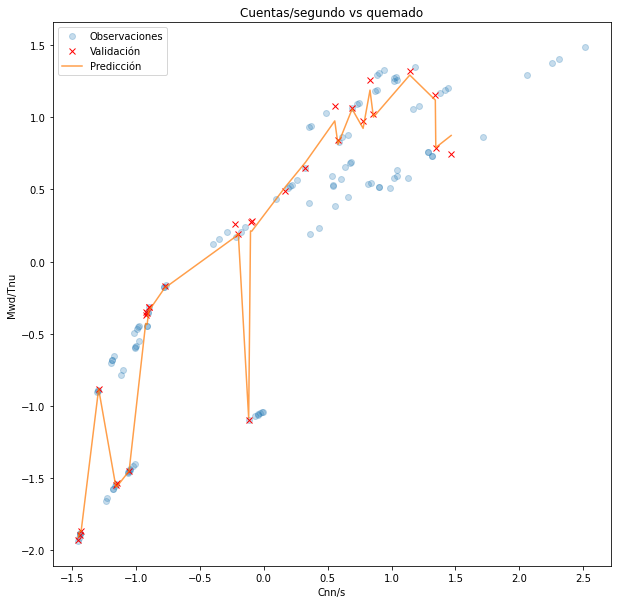

,Cnn/s_val,Mwd/TnU_val,Mwd/TnU_pred,Error
0,-1.451293,-1.925407,-1.907614,-0.92%
1,-1.441000,-1.895776,-1.870437,-1.34%
2,-1.429678,-1.864131,-1.866085,0.10%
3,-1.292855,-0.882885,-0.881307,-0.18%
4,-1.158018,-1.545069,-1.558642,0.88%
5,-1.149636,-1.533691,-1.558145,1.59%
6,-1.054353,-1.448592,-1.449994,0.10%
7,-0.924588,-0.349772,-0.428070,22.39%
8,-0.923265,-0.371817,-0.434276,16.80%
9,-0.913266,-0.358898,-0.434276,21.00%


Precisión del entrenamiento = 99.93%
Precisión de la validación = 99.77%

RMSE = 0.05

MAE = 0.04


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# X almacena las variables independientes
# Y almacena la variable dependiente
X = data.iloc[:, 5:9].values
Y = data.iloc[:, 9].values
# print(X)
# print(Y)

# División de los datos en conjuntos de entrenamiento y validación
Xent, Xval, Yent, Yval = train_test_split(X, Y, test_size = 0.2)
# print(len(Xent), len(Yent))
# print(len(Xval), len(Yval))

# Aplicar el algoritmo y entrenar
bosque = RandomForestRegressor(n_estimators = 2000, max_depth = 6)
bosque.fit(Xent, Yent)

# Predicción
Ypred = bosque.predict(Xval)

# Error relativo
Error = pd.DataFrame(columns=['Error'])
for n in range(len(Ypred)):
    error = ((Ypred[n] - Yval[n])/Yval[n])*100
    Error = Error.append({'Error': '{0:.2f}%'.format(error)}, ignore_index = True)


# Ordeno los valores de menor a mayor abscisa para que la representación se vea mejor
Pred = pd.DataFrame({'Cnn/s_val': Xval[:, 0], 'Mwd/TnU_val': Yval, 'Mwd/TnU_pred': Ypred, 'Error': Error['Error']})
Pred = Pred.sort_values('Cnn/s_val')
Pred = Pred.reset_index(drop=True)

fig,ax = plt.subplots(figsize=(10,10))
ax.plot(Xent[:, 0], Yent, 'o', alpha=0.25, label='Observaciones')
ax.plot(Pred['Cnn/s_val'], Pred['Mwd/TnU_val'], 'x', color='red', label='Validación')
ax.plot(Pred['Cnn/s_val'], Pred['Mwd/TnU_pred'], alpha=0.75, label='Predicción')
ax.set_title('Cuentas/segundo vs quemado')
ax.set_xlabel('Cnn/s')
ax.set_ylabel('Mwd/Tnu')
ax.legend(fontsize=10)
plt.show()
plt.close()


display(Pred)

precEnt = bosque.score(Xent, Yent)
precVal = bosque.score(Xval, Yval)
print('Precisión del entrenamiento =', '{0:.2f}%'.format(100*precEnt))
print('Precisión de la validación =', '{0:.2f}%'.format(100*precVal))
print()
rmse = mean_squared_error(Yval, Ypred, squared = False)
print('RMSE =', '{0:.2f}'.format(rmse))
print()
mae = mean_absolute_error(Yval, Ypred)
print('MAE =', '{0:.2f}'.format(mae))

Los resultados son tan extraordinariamente buenos porque he hecho completamente aleatoria la división de los conjuntos de entrenamiento y valicación, y hay datos de un mismo elemento en los dos conjuntos que son prácticamente idénticos.

Estoy validando prácticamente con los mimos datos con los que entreno.

### Repito la regresión separando en el conjunto de validación los datos completos de 5 elementos aleatorios

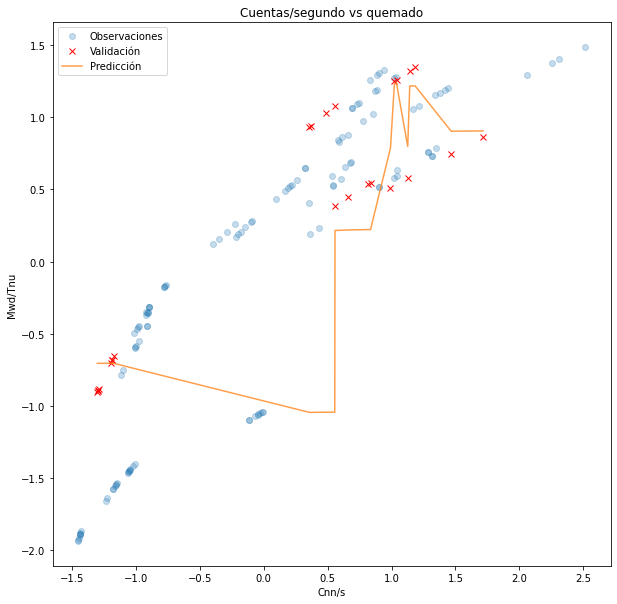

,Cnn/s_val,Mwd/TnU_val,Mwd/TnU_pred,Error
0,-1.303516,-0.905760,-0.704404,-22.23%
1,-1.298075,-0.893908,-0.704404,-21.20%
2,-1.296826,-0.891300,-0.704404,-20.97%
3,-1.292855,-0.882885,-0.704404,-20.22%
4,-1.199557,-0.699294,-0.704112,0.69%
5,-1.191396,-0.684479,-0.704112,2.87%
6,-1.190000,-0.681990,-0.704112,3.24%
7,-1.175957,-0.656982,-0.704111,7.17%
8,0.357104,0.930387,-1.044221,-212.24%
9,0.368059,0.938565,-1.044221,-211.26%


Precisión del entrenamiento = 99.97%
Precisión de la validación = -6.01%

RMSE = 0.85

MAE = 0.46


In [21]:
# Hago una lista con la identificación de cada elemento
lista = data['EECC'].unique().tolist()
# print(lista)

# Selecciono 5 elementos aleatorios y los separo, para generar un data frame de validación y otro de entrenamiento
random = np.random.choice(a=len(lista), size=5, replace=False)
# print(random)
valid = pd.DataFrame()
agrupa = data.groupby(data.EECC)
for excluidos in random:
    val = agrupa.get_group(lista[excluidos])
    valid = valid.append(val)
entren = data.drop(valid.index)
# print(valid)
# print(entren)


# Repito el proceso anterior
Xent = entren.iloc[:, 5:9].values
Xval = valid.iloc[:, 5:9].values
Yent = entren.iloc[:, 9].values
Yval = valid.iloc[:, 9].values

# Aplicar el algoritmo y entrenar
bosque = RandomForestRegressor(n_estimators = 4000, max_depth = 9)
bosque.fit(Xent, Yent)
'''
EN PRINCIPIO CUANTOS MÁS ÁRBOLES MEJOR, PERO NO HE VISTO DIFERENCIA SIGNITICATIVA EN UN RANGO DE ENTRE 200 A 50000.
TAMPOCO APRECIO DIFERENCIAS ENTRE PROFUNDIADES DE VALOR ENTRE 4 Y 12.
¿HAY ALGÚN MODO DE ELEGIR EL NÚMERO DE ESTIMADORES Y DE PROFUNDIDAD MÁS ÓPTIMOS?
'''

# Predicción
Ypred = bosque.predict(Xval)

# Error relativo
Error = pd.DataFrame(columns=['Error'])
for n in range(len(Ypred)):
    error = ((Ypred[n] - Yval[n])/Yval[n])*100
    Error = Error.append({'Error': '{0:.2f}%'.format(error)}, ignore_index = True)


# Ordeno los valores de menor a mayor abscisa para que la representación se vea mejor
Pred = pd.DataFrame({'Cnn/s_val': Xval[:, 0], 'Mwd/TnU_val': Yval, 'Mwd/TnU_pred': Ypred, 'Error': Error['Error']})
Pred = Pred.sort_values('Cnn/s_val')
Pred = Pred.reset_index(drop=True)

fig,ax = plt.subplots(figsize=(10,10))
ax.plot(Xent[:, 0], Yent, 'o', alpha=0.25, label='Observaciones')
ax.plot(Pred['Cnn/s_val'], Pred['Mwd/TnU_val'], 'x', color='red', label='Validación')
ax.plot(Pred['Cnn/s_val'], Pred['Mwd/TnU_pred'], alpha=0.75, label='Predicción')
ax.set_title('Cuentas/segundo vs quemado')
ax.set_xlabel('Cnn/s')
ax.set_ylabel('Mwd/Tnu')
ax.legend(fontsize=10)
plt.show()
plt.close()


display(Pred)

precEnt = bosque.score(Xent, Yent)
precVal = bosque.score(Xval, Yval)
print('Precisión del entrenamiento =', '{0:.2f}%'.format(100*precEnt))
print('Precisión de la validación =', '{0:.2f}%'.format(100*precVal))
print()
rmse = mean_squared_error(Yval, Ypred, squared = False)
print('RMSE =', '{0:.2f}'.format(rmse))
print()
mae = mean_absolute_error(Yval, Ypred)
print('MAE =', '{0:.2f}'.format(mae))

#### Algunas veces hace buenas predicciones y otras tiene una precisión malísima

### Repito la regresión separando en el conjunto de validación los datos completos de 1 solo elemento aleatorio

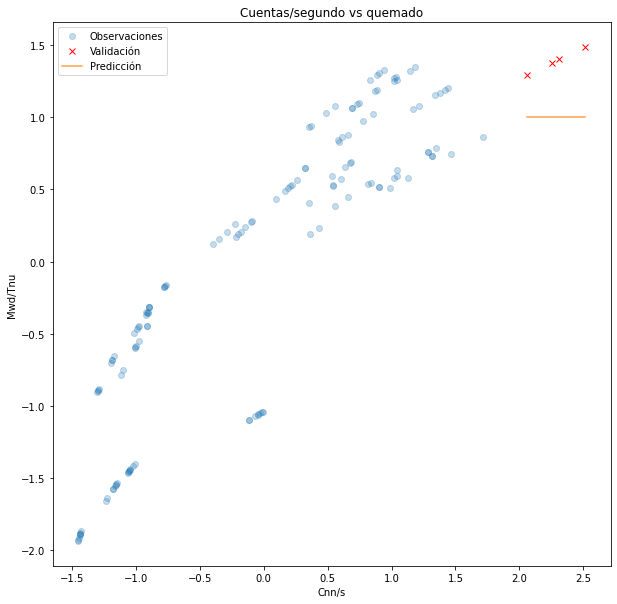

,Cnn/s_val,Mwd/TnU_val,Mwd/TnU_pred,Error
0,2.062867,1.296502,1.004075,-22.56%
1,2.254095,1.378993,1.004075,-27.19%
2,2.311956,1.403409,1.004075,-28.45%
3,2.516418,1.487678,1.004075,-32.51%


Precisión del entrenamiento = 99.98%
Precisión de la validación = -3235.03%

RMSE = 0.39

MAE = 0.39


In [22]:
# Hago una lista con la identificación de cada elemento
lista = data['EECC'].unique().tolist()
# print(lista)

# Selecciono 1 elemento aleatorio y lo separo, para generar un data frame de validación y otro de entrenamiento.
excluido = np.random.choice(a=len(lista), size=1)
agrupa = data.groupby(data.EECC)
valid = agrupa.get_group(lista[int(excluido)])
valid = pd.DataFrame(valid)
entren = data.drop(valid.index)
# print(valid)
# print(entren)


# Repito el proceso anterior
Xent = entren.iloc[:, 5:9].values
Xval = valid.iloc[:, 5:9].values
Yent = entren.iloc[:, 9].values
Yval = valid.iloc[:, 9].values

# Aplicar el algoritmo y entrenar
bosque = RandomForestRegressor(n_estimators = 4000, max_depth = 10)
bosque.fit(Xent, Yent)

# Predicción
Ypred = bosque.predict(Xval)

# Error relativo
Error = pd.DataFrame(columns=['Error'])
for n in range(len(Ypred)):
    error = ((Ypred[n] - Yval[n])/Yval[n])*100
    Error = Error.append({'Error': '{0:.2f}%'.format(error)}, ignore_index = True)


# Ordeno los valores de menor a mayor abscisa para que la representación se vea mejor
Pred = pd.DataFrame({'Cnn/s_val': Xval[:, 0], 'Mwd/TnU_val': Yval, 'Mwd/TnU_pred': Ypred, 'Error': Error['Error']})
Pred = Pred.sort_values('Cnn/s_val')
Pred = Pred.reset_index(drop=True)

fig,ax = plt.subplots(figsize=(10,10))
ax.plot(Xent[:, 0], Yent, 'o', alpha=0.25, label='Observaciones')
ax.plot(Pred['Cnn/s_val'], Pred['Mwd/TnU_val'], 'x', color='red', label='Validación')
ax.plot(Pred['Cnn/s_val'], Pred['Mwd/TnU_pred'], alpha=0.75, label='Predicción')
ax.set_title('Cuentas/segundo vs quemado')
ax.set_xlabel('Cnn/s')
ax.set_ylabel('Mwd/Tnu')
ax.legend(fontsize=10)
plt.show()
plt.close()


display(Pred)

precEnt = bosque.score(Xent, Yent)
precVal = bosque.score(Xval, Yval)
print('Precisión del entrenamiento =', '{0:.2f}%'.format(100*precEnt))
print('Precisión de la validación =', '{0:.2f}%'.format(100*precVal))
print()
rmse = mean_squared_error(Yval, Ypred, squared = False)
print('RMSE =', '{0:.2f}'.format(rmse))
print()
mae = mean_absolute_error(Yval, Ypred)
print('MAE =', '{0:.2f}'.format(mae))

#### La precisión también es muy variable, pero en general es mucho peor.

### Repito la regresión utilizando los datos de los EECC completos just for fun.

In [23]:
# dataEECC.head()

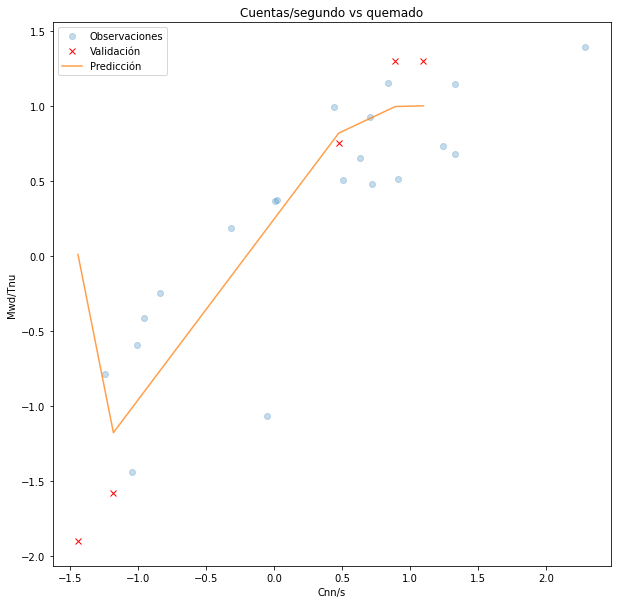

,Cnn/s_val,Mwd/TnU_val,Mwd/TnU_pred,Error
0,-1.441800,-1.898310,0.010418,-100.55%
1,-1.181131,-1.577885,-1.176394,-25.44%
2,0.475087,0.749166,0.817940,9.18%
3,0.891198,1.296976,0.994823,-23.30%
4,1.097535,1.295909,0.999201,-22.90%


Precisión del entrenamiento = 95.51%
Precisión de la validación = 60.16%

RMSE = 0.89

MAE = 0.60


In [24]:
# X almacena las variables independientes
# Y almacena la variable dependiente
X = dataEECC.iloc[:, 3:7].values
Y = dataEECC.iloc[:, 7].values
# print(X)
# print(Y)

# División de los datos en conjuntos de entrenamiento y validación
Xent, Xval, Yent, Yval = train_test_split(X, Y, test_size = 0.2)
# print(len(Xent), len(Yent))
# print(len(Xval), len(Yval))

# Aplicar el algoritmo y entrenar
bosque = RandomForestRegressor(n_estimators = 5000, max_depth = 4)
bosque.fit(Xent, Yent)

# Predicción
Ypred = bosque.predict(Xval)

# Error relativo
Error = pd.DataFrame(columns=['Error'])
for n in range(len(Ypred)):
    error = ((Ypred[n] - Yval[n])/Yval[n])*100
    Error = Error.append({'Error': '{0:.2f}%'.format(error)}, ignore_index = True)


# Ordeno los valores de menor a mayor abscisa para que la representación se vea mejor
Pred = pd.DataFrame({'Cnn/s_val': Xval[:, 0], 'Mwd/TnU_val': Yval, 'Mwd/TnU_pred': Ypred, 'Error': Error['Error']})
Pred = Pred.sort_values('Cnn/s_val')
Pred = Pred.reset_index(drop=True)

fig,ax = plt.subplots(figsize=(10,10))
ax.plot(Xent[:, 0], Yent, 'o', alpha=0.25, label='Observaciones')
ax.plot(Pred['Cnn/s_val'], Pred['Mwd/TnU_val'], 'x', color='red', label='Validación')
ax.plot(Pred['Cnn/s_val'], Pred['Mwd/TnU_pred'], alpha=0.75, label='Predicción')
ax.set_title('Cuentas/segundo vs quemado')
ax.set_xlabel('Cnn/s')
ax.set_ylabel('Mwd/Tnu')
ax.legend(fontsize=10)
plt.show()
plt.close()


display(Pred)

precEnt = bosque.score(Xent, Yent)
precVal = bosque.score(Xval, Yval)
print('Precisión del entrenamiento =', '{0:.2f}%'.format(100*precEnt))
print('Precisión de la validación =', '{0:.2f}%'.format(100*precVal))
print()
rmse = mean_squared_error(Yval, Ypred, squared = False)
print('RMSE =', '{0:.2f}'.format(rmse))
print()
mae = mean_absolute_error(Yval, Ypred)
print('MAE =', '{0:.2f}'.format(mae))

Parece que la muestra es demasiado pequeña para que puedan hacerse buenas predicciones, al menos con estos métodos.